### 线性回归回顾

首先简单回顾一下，线性回归是一种机器学习算法，它用于预测连续的输出变量（也称为目标变量或响应变量），其中输出变量与输入变量之间具有线性关系。

在线性回归中，我们假设输出变量与输入变量之间具有如下线性关系：

$$ y = wx + b $$

其中，$y$ 是输出变量，$x$ 是输入变量，$w$ 和 $b$ 是参数，$w$ 称为权重或斜率，$b$ 称为偏差。

我们的目标是通过训练样本，找到最优的参数 $w$ 和 $b$，使得模型能够准确地预测新的样本。为了找到最优的参数，我们需要定义一个损失函数，表示模型的预测精度。在线性回归中，常用的损失函数是均方误差（mean squared error, MSE）：

$$ MSE = \frac{1}{n}\sum_{i=1}^{n}(y_{i} - \hat{y}_{i})^{2} $$

其中，$y_{i}$ 是第 $i$ 个样本的真实输出值，$\hat{y}_{i}$ 是模型预测的输出值，$n$ 是样本数量。

可以使用梯度下降算法来最小化损失函数，即不断更新参数 $w$ 和 $b$，使得损失函数的值越来越小。

具体来说，我们需要计算损失函数对 $w$ 和 $b$ 的梯度，然后按照如下公式更新参数：

$$ w = w - \alpha \frac{\partial L}{\partial w} $$
$$ b = b - \alpha \frac{\partial L}{\partial b} $$

其中，$\alpha$ 是学习率，$L$ 是损失函数，$\frac{\partial L}{\partial w}$ 和 $\frac{\partial L}{\partial b}$ 分别表示损失函数对 $w$ 和 $b$ 的梯度。

我们可以重复进行这个过程，直到损失函数的值足够小，或者达到了设定的最大迭代次数为止。

### 代码实现

#### 数据生成

In [1]:
import numpy as np
import torch

# 设置随机数种子，使得每次运行代码生成的数据相同
np.random.seed(42)

# 生成随机数据，w为2，b为1
x = np.random.rand(100, 1)
y = 1 + 2 * x + 0.1 * np.random.randn(100, 1)

# 将数据转换为 pytorch tensor
x_tensor = torch.from_numpy(x).float()
y_tensor = torch.from_numpy(y).float()

#### 设置超参数

In [2]:
# 设置超参数
learning_rate = 0.1
num_epochs = 1000

#### 初始化参数

In [3]:
# 初始化参数，可以使用常数、随机数或预训练等
w = torch.randn(1, requires_grad = True)
b = torch.zeros(1, requires_grad = True)

#### 开始训练

In [4]:
# 开始训练
for epoch in range(num_epochs):
    # 计算预测值
    y_pred = x_tensor * w + b

    # 计算损失
    loss = ((y_pred - y_tensor) ** 2).mean()

    # 反向传播
    loss.backward()

    # 更新参数
    with torch.no_grad():
        w -= learning_rate * w.grad
        b -= learning_rate * b.grad

        # 清空梯度
        w.grad.zero_()
        b.grad.zero_()

# 输出训练后的参数，与数据生成时设置的常数基本一致
print('w:', w)
print('b:', b)

w: tensor([1.9540], requires_grad=True)
b: tensor([1.0215], requires_grad=True)


#### 可视化

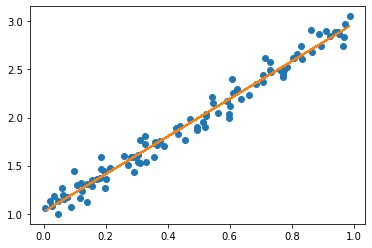

In [5]:
import matplotlib.pyplot as plt

plt.plot(x, y, 'o')
plt.plot(x_tensor.numpy(), y_pred.detach().numpy())
plt.show()

### 完整代码

In [6]:
import numpy as np
import torch

# 设置随机数种子，使得每次运行代码生成的数据相同
np.random.seed(42)

# 生成随机数据，w为2，b为1
x = np.random.rand(100, 1)
y = 1 + 2 * x + 0.1 * np.random.randn(100, 1)

# 将数据转换为 pytorch tensor
x_tensor = torch.from_numpy(x).float()
y_tensor = torch.from_numpy(y).float()

# 设置超参数
learning_rate = 0.1
num_epochs = 1000

# 初始化参数，可以使用常数、随机数或预训练等
w = torch.randn(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# 开始训练
for epoch in range(num_epochs):
    # 计算预测值
    y_pred = x_tensor * w + b

    # 计算损失
    loss = ((y_pred - y_tensor) ** 2).mean()

    # 反向传播
    loss.backward()

    # 更新参数
    with torch.no_grad():
        w -= learning_rate * w.grad
        b -= learning_rate * b.grad

        # 清空梯度
        w.grad.zero_()
        b.grad.zero_()

# 输出训练后的参数，与数据生成时设置的常数基本一致
print('w:', w)
print('b:', b)

w: tensor([1.9540], requires_grad=True)
b: tensor([1.0215], requires_grad=True)


### Pytorch模型实现

In [7]:
import numpy as np
import torch
import torch.nn as nn

# 设置随机数种子，使得每次运行代码生成的数据相同
np.random.seed(42)

# 生成随机数据
x = np.random.rand(100, 1)
y = 1 + 2 * x + 0.1 * np.random.randn(100, 1)

# 将数据转换为 pytorch tensor
x_tensor = torch.from_numpy(x).float()
y_tensor = torch.from_numpy(y).float()

# 设置超参数
learning_rate = 0.1
num_epochs = 1000

# 定义输入数据的维度和输出数据的维度
input_dim = 1
output_dim = 1

# 定义模型，就是一个神经元
model = nn.Linear(input_dim, output_dim)

# 定义损失函数和优化器
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

# 开始训练
for epoch in range(num_epochs):
    # 将输入数据喂给模型
    y_pred = model(x_tensor)

    # 计算损失
    loss = criterion(y_pred, y_tensor)
    
    # 清空梯度
    optimizer.zero_grad()

    # 反向传播
    loss.backward()

    # 更新参数
    optimizer.step()

# 输出训练后的参数
print('w:', model.weight.data)
print('b:', model.bias.data)

w: tensor([[1.9540]])
b: tensor([1.0215])
